<a href="https://colab.research.google.com/github/a-deriva/notebooks/blob/main/asteroide/asteroide_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
plt.style.use('dark_background')
plt.rc('font', size=15)

In [8]:
file = 'https://github.com/a-deriva/notebooks/raw/main/asteroide/asteroid_data.txt'
data = pd.read_csv(file, sep=',')
data

,dist [AU],angle [deg],dist_err [AU]
0,2.12692,120.0,0.106346
1,2.13106,122.5,0.106553
2,2.26023,127.3,0.113012
3,2.41057,129.1,0.120529
4,3.33049,170.4,0.166524
5,3.54764,171.8,0.177382
6,3.43319,173.3,0.171659
7,3.52295,175.9,0.176147


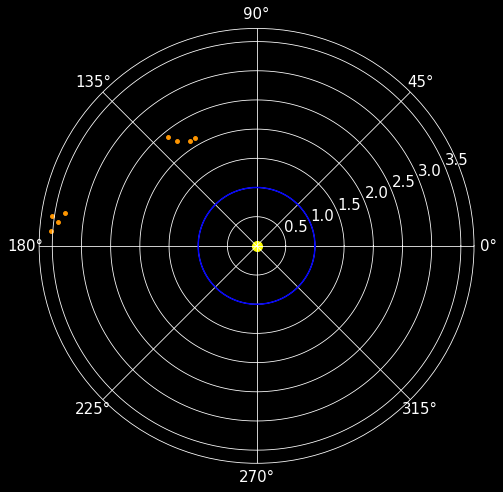

In [4]:
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111, projection='polar')
ax.scatter(data['angle [deg]'] * np.pi / 180, data['dist [AU]'], color='#FF9600', s=15)

theta = np.linspace(0, 2 * np.pi, 1000)
r_T = 1

ax.plot(theta, np.repeat(r_T, 1000), color='blue')
ax.scatter(0, 0, marker='o', color='yellow', s=100)

plt.show()

$$\chi^2=\sum_{i=1}^n\left(\dfrac{r_{obs}-r_{modelo}}{\sigma_{obs}}\right)^2$$
$$r_{modelo}=\dfrac{a(1-e^2)}{1+e\cos\theta},\ e=\dfrac{\sqrt{a^2-b^2}}{a}$$

In [5]:
def chi2_polar(theta_obs, r_obs, r_err, ai_guess, af_guess, bi_guess, bf_guess, steps, precision):
  start = time.time()
  iteration = 0
  while((af_guess - ai_guess) / np.mean([ai_guess, af_guess]) >= precision) and ((bf_guess - bi_guess) / np.mean([bi_guess, bf_guess]) >= precision):
    chi2 = np.zeros(shape = (steps, steps))
    a_tests = np.linspace(ai_guess, af_guess, steps)
    b_tests = np.linspace(bi_guess, bf_guess, steps)
    for i in range(steps):
      for j in range(steps):
        e = np.sqrt(a_tests[i]**2 - b_tests[j]**2) / a_tests[i]
        chi2[i][j] = np.sum(((r_obs - (a_tests[i] * (1 - e**2) / (1 + e * np.cos(theta_obs)))) / r_err)**2)
    a_min_pos = np.where(chi2 == np.min(chi2))[0][0]
    a_value = a_tests[a_min_pos]
    ai_guess = a_value - 0.2 * a_value / (iteration + 1)
    af_guess = a_value + 0.2 * a_value / (iteration + 1)
    b_min_pos = np.where(chi2 == np.min(chi2))[1][0]
    b_value = b_tests[b_min_pos]
    bi_guess = b_value - 0.2 * b_value / (iteration + 1)
    bf_guess = b_value + 0.2 * b_value / (iteration + 1)
    print('Valores ajustados: a = ' + str(a_value) + ', b = ' + str(b_value))
    iteration += 1
  end = time.time()
  print('Tempo de computação: ' + str(end-start) + ' segundos; com ' + str(100*precision) + '%' + ' de precisão, ' + str(iteration) + ' iterações e ' + str(iteration*steps**2) + ' elipses testadas.')
  return [a_value, b_value]

In [6]:
a, b = chi2_polar(data['angle [deg]'] * np.pi / 180, data['dist [AU]'], data['dist_err [AU]'], 1, 3, .2, 1, 20, .01)

Valores ajustados: a = 1.736842105263158, b = 1.0
Valores ajustados: a = 1.8282548476454297, b = 1.2
Valores ajustados: a = 1.9148563930602132, b = 1.3199999999999998
Valores ajustados: a = 1.9753255423147464, b = 1.408
Valores ajustados: a = 2.022109568316938, b = 1.4784
Valores ajustados: a = 2.0604232232955746, b = 1.537536
Valores ajustados: a = 2.0929562215581363, b = 1.5887872
Valores ajustados: a = 2.1212819448574196, b = 1.63418112
Valores ajustados: a = 2.140820068033738, b = 1.6750356480000002
Valores ajustados: a = 2.1633550161183037, b = 1.7122586624000002
Valores ajustados: a = 2.1838499583762667, b = 1.7465038356480003
Valores ajustados: a = 2.1984786183845286, b = 1.7782584508416002
Valores ajustados: a = 2.2158350285296695, b = 1.8078960916889601
Valores ajustados: a = 2.228394417355344, b = 1.8327821107648405
Valores ajustados: a = 2.2267189328310164, b = 1.8314040791026114
Valores ajustados: a = 2.225156323053591, b = 1.8301188832576272
Valores ajustados: a = 2.226620

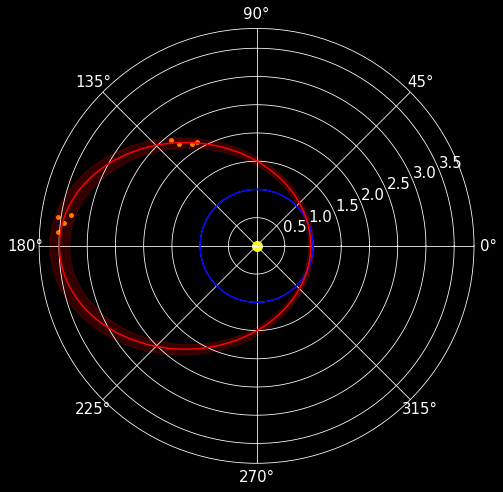

In [7]:
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111, projection='polar')
ax.scatter(data['angle [deg]'] * np.pi / 180, data['dist [AU]'], color='#FF9600', s=15)

theta = np.linspace(0, 2 * np.pi, 1000)
r_T = 1

ax.plot(theta, np.repeat(r_T, 1000), color='blue')
ax.scatter(0, 0, marker='o', color='yellow', s=100)

e = np.sqrt(a ** 2 - b ** 2) / a
r = a * (1 - e ** 2) / (1 + e * np.cos(theta))
ax.plot(theta, r, color='red')

e1 = np.sqrt((a + 0.05 * a) ** 2 - (b + 0.05 * b) ** 2) / (a + 0.05 * a) 
r1 = (a + 0.05 * a) * (1 - e1 ** 2) / (1 + e1 * np.cos(theta))
e2 = np.sqrt((a - 0.05 * a) ** 2 - (b - 0.05 * b) ** 2) / (a - 0.05 * a)
r2 = (a - 0.05 * a) * (1 - e2 ** 2) / (1 + e2 * np.cos(theta))

ax.fill_between(theta, r1, r2, alpha = 0.2, color='red')

plt.show()